# **Titanic Project**

**Getting Started**

**Problem Statement:**

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Importing the Model Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#Importing Boosting Models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

#Importing Error Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc,f1_score


In [ ]:
#Loading preprocessing pipline functions

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore

In [ ]:
#Reading the CSV file of the dataset
#Pandas read_csv() function imports a CSV file (in our case, 'titanic_train.csv’) to DataFrame format.

df=pd.read_csv('/content/drive/MyDrive/Python_Datasets/titanic_train.csv')

In [ ]:
# Calling our dataset in jupyter Notebook.

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Examining the Data
#After importing the data, to learn more about the dataset, we’ll use .head() .info() and .describe() methods

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#The .info() method will give you a concise summary of the DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observation** : We have int, float,categorical type value in different independent variables and Survived is our target variable in which we have classes

In [ ]:
#The shape of the dataset

df.shape

(891, 12)

**Observation** : This shows that our dataset contains 891 rows i.e. instances of Titanic Passengers and 12 columns i.e. the specifications like Sex ,Age, SibSp,Parch, etc.

In [ ]:
# Description of Data

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Unique occurrences of ‘Survived’ column

df['Survived'].unique()

array([0, 1])

**Observation** : As we can see, there are 2 unique values in the ‘Survived’ column of the dataset i.e, 0 and 1

In [ ]:
#Count of the unique occurrences of ‘Survived’ column

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Observation** : There are 342 persons who survived and 549 persons who didnt survived in Titanic 

In [ ]:
# checking the features, their shape, duplicate values and nan values in the Datasets

print("\nFeatures Present in the Dataset: \n", df.columns)
shape=df.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])
print("\n\nData Types of Features :\n", df.dtypes)
print("\nDataset contains any NaN/Empty cells : ", df.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", df.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in df.columns.values:
    print("Number of unique values of {} : {}".format(col, df[col].nunique()))
    
print ('\nSurvived and Not-Survived counts','\n',df.Survived.value_counts())


Features Present in the Dataset: 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Total Number of Rows :  891
Total Number of Features :  12


Data Types of Features :
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Dataset contains any NaN/Empty cells :  True

Total number of empty rows in each feature:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 


Total number of unique values in each feature:
Number of unique values of PassengerId : 891
Numbe

In [ ]:
#Checking for Null Values

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

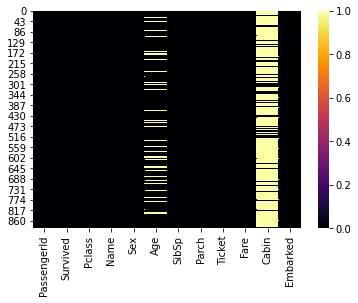

In [ ]:
#Checking of null values in our dataset by passing a heatmap function.

sns.heatmap(df.isnull(),cmap='inferno')

**Observation** : There are null values present in the Dataset.

In [ ]:
# Gender Distribution

df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

# **EDA (Exploratory Data Analysis)**

**1.Univariate Analysis**

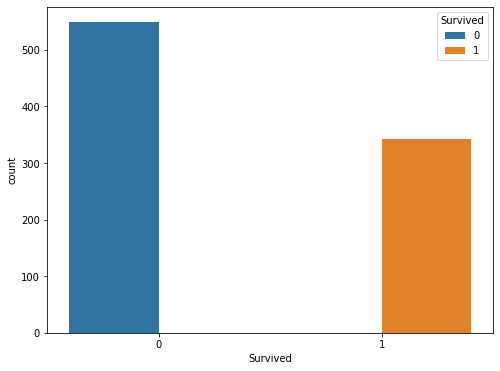

In [ ]:
#Plotting Survival Distribution

plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=df , hue="Survived",saturation=0.75 )
plt.show()

**Observation** : There is a presence of Class Imbalance problem .

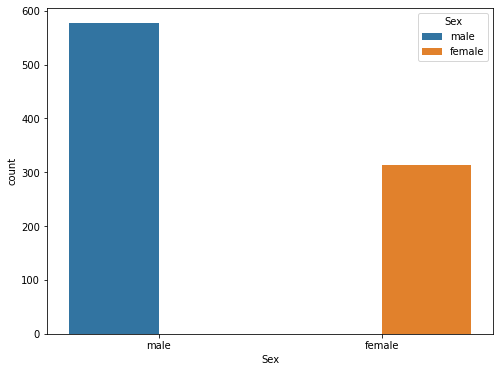

In [ ]:
#Plotting Sex Distribution

plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data=df , hue="Sex",saturation=0.75 )
plt.show()

**Observation** : Clearly , There are more number of Male than Female

In [ ]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

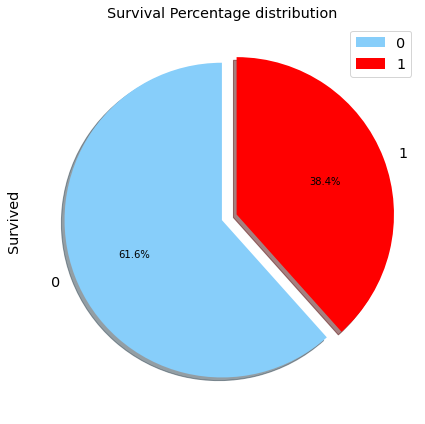

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
order = list(df['Survived'].value_counts().index)

#pop_labels = ['3','4','5','6','7','8']
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','violet']
explode = (0,0.1)
df['Survived'].value_counts().plot.pie(explode=explode , colors = colors ,startangle=90 ,autopct='%.1f%%',shadow=True, ax=ax)
ax.set_title('Survival Percentage distribution');
ax.legend(loc = "upper right") 
plt.tight_layout() 
plt.show()

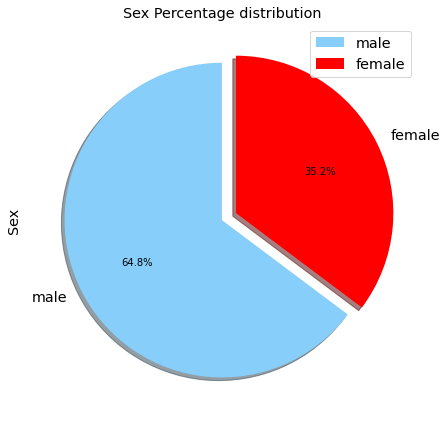

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
order = list(df['Sex'].value_counts().index)

#pop_labels = ['3','4','5','6','7','8']
colors = ['green', 'gold','violet']
explode = (0,0.1)
df['Sex'].value_counts().plot.pie(explode=explode , colors = colors ,startangle=90 ,autopct='%.1f%%',shadow=True, ax=ax)
ax.set_title('Sex Percentage distribution');
ax.legend(loc = "upper right") 
plt.tight_layout() 
plt.show()

In [ ]:
#let's check out survivors w.r.t sex

pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


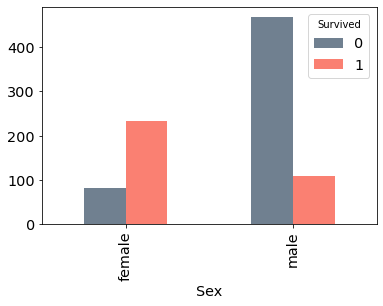

In [ ]:
#Plot 

pd.crosstab(df.Sex, df.Survived).plot(kind = 'bar', color = ['slategray', 'salmon']);

**Observation** : Clearly , There are more no. of Female who survived than Male

In [ ]:
#Survivors w.r.t pclass

pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


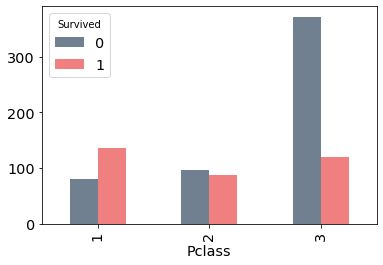

In [ ]:
pd.crosstab(df.Pclass, df.Survived).plot(kind = 'bar', color = ['slategray', 'lightcoral']);

**Observation** : Clearly Pclass 1 has the highest survivors and Pclass 3 has more deaths .

In [ ]:
#Let's check the Port of Embarkation

df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

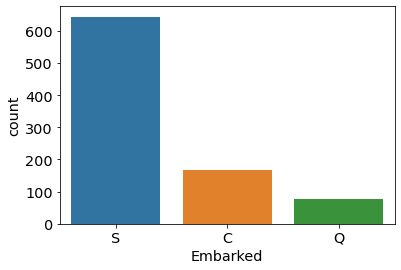

In [ ]:
sns.countplot(x = 'Embarked', data = df);

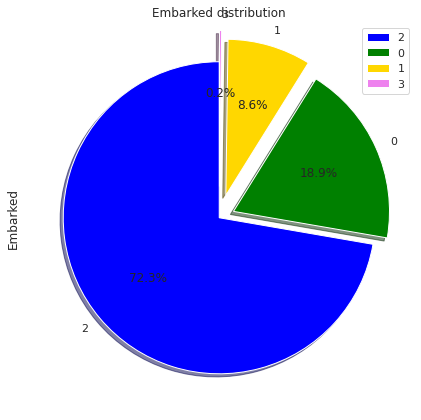

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
order = list(df['Embarked'].value_counts().index)

#pop_labels = ['3','4','5','6','7','8']
colors = ['blue', 'green', 'gold','violet']
explode = (0,0.1,0.15,0.2)
df['Embarked'].value_counts().plot.pie(explode=explode , colors = colors ,startangle=90 ,autopct='%.1f%%',shadow=True, ax=ax)
ax.set_title('Embarked distribution');
ax.legend(loc = "upper right") 
plt.tight_layout() 
plt.show()

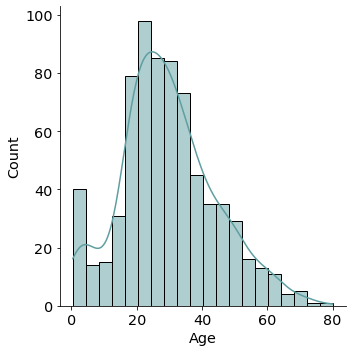

In [ ]:
#PLot Age Distribution

sns.displot(x = 'Age', data = df, color = 'cadetblue', kde = True);

**Observation** : Clearly Most persons are between the age range (20-40)

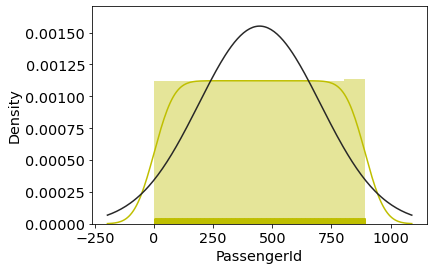

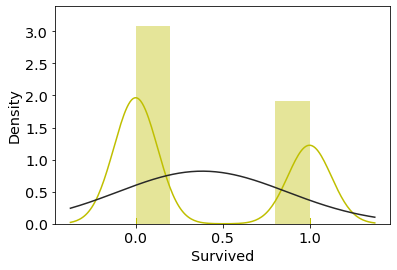

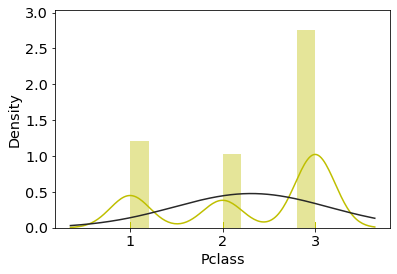

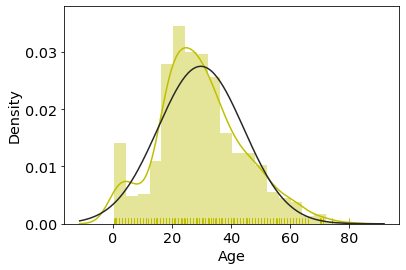

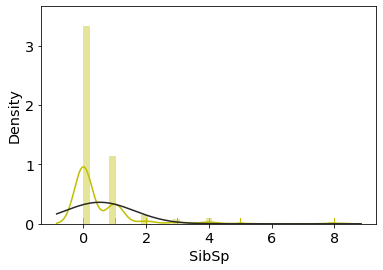

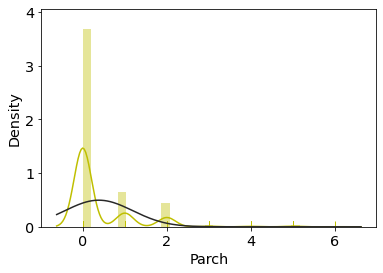

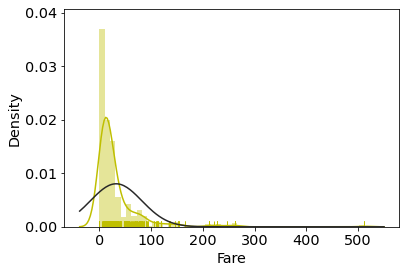

In [ ]:
# Making of distplot to show the skewness in different columns

from scipy.stats import norm
for g in df.describe().columns:
    sns.distplot(df[g] , rug=True , color = 'y' , fit=norm)
    plt.show()

**Observation** : It looks like many specification are not normally distributed .

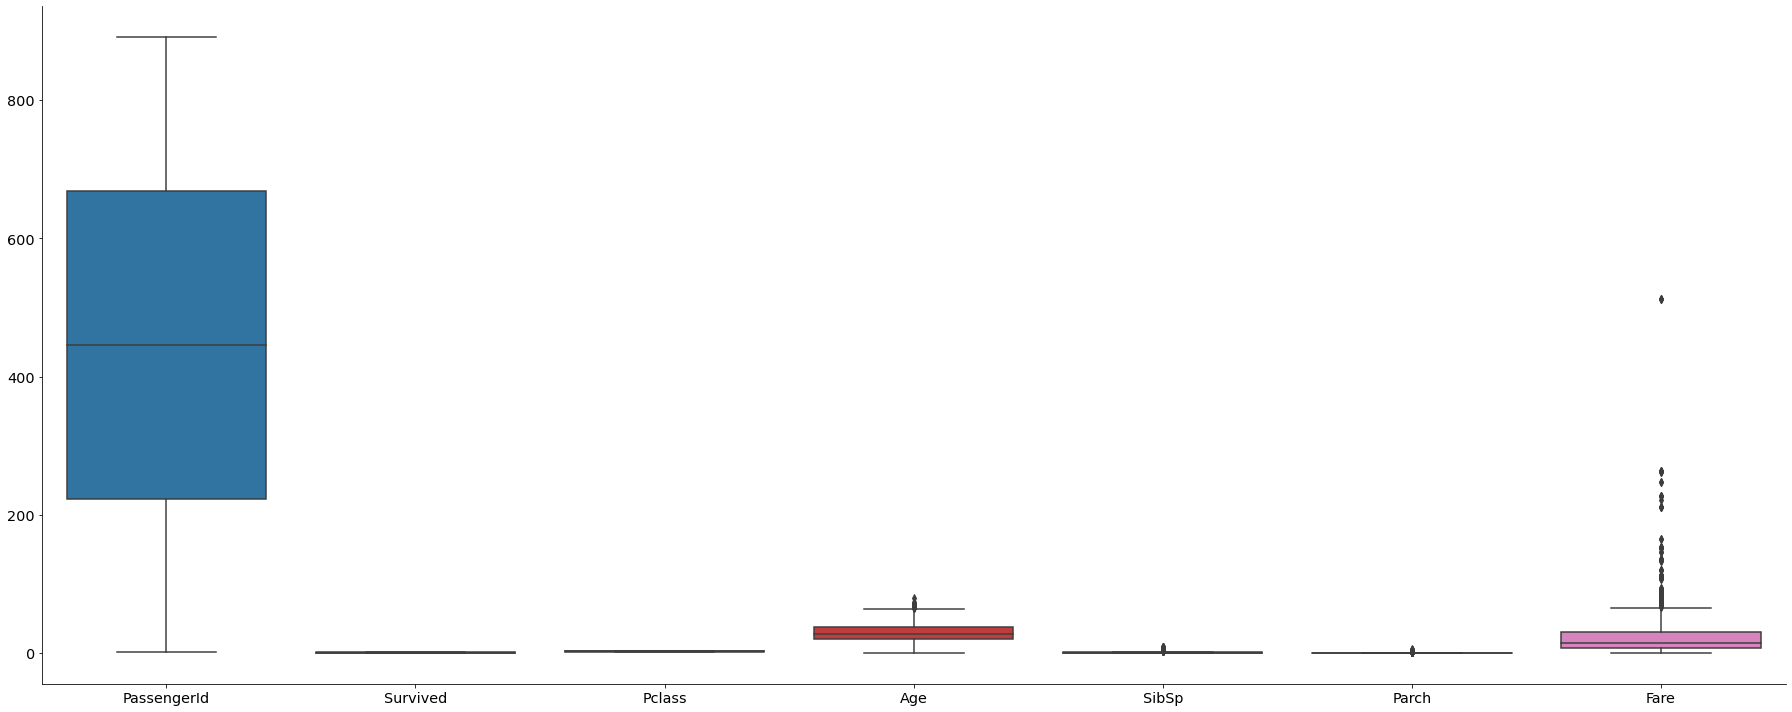

In [ ]:

sns.factorplot(data=df,kind='box',size=10,aspect=2.5) 

**Observation** : There are some outliers present in the Dataset

**2.Bivariate Analysis**

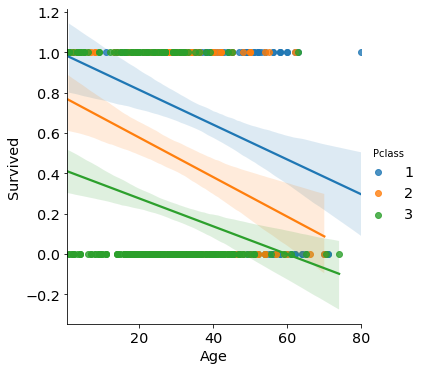

In [ ]:
#Let's now find a relation among age, survived and pclass columns

sns.lmplot(x = 'Age', y = 'Survived', hue = 'Pclass', data = df);

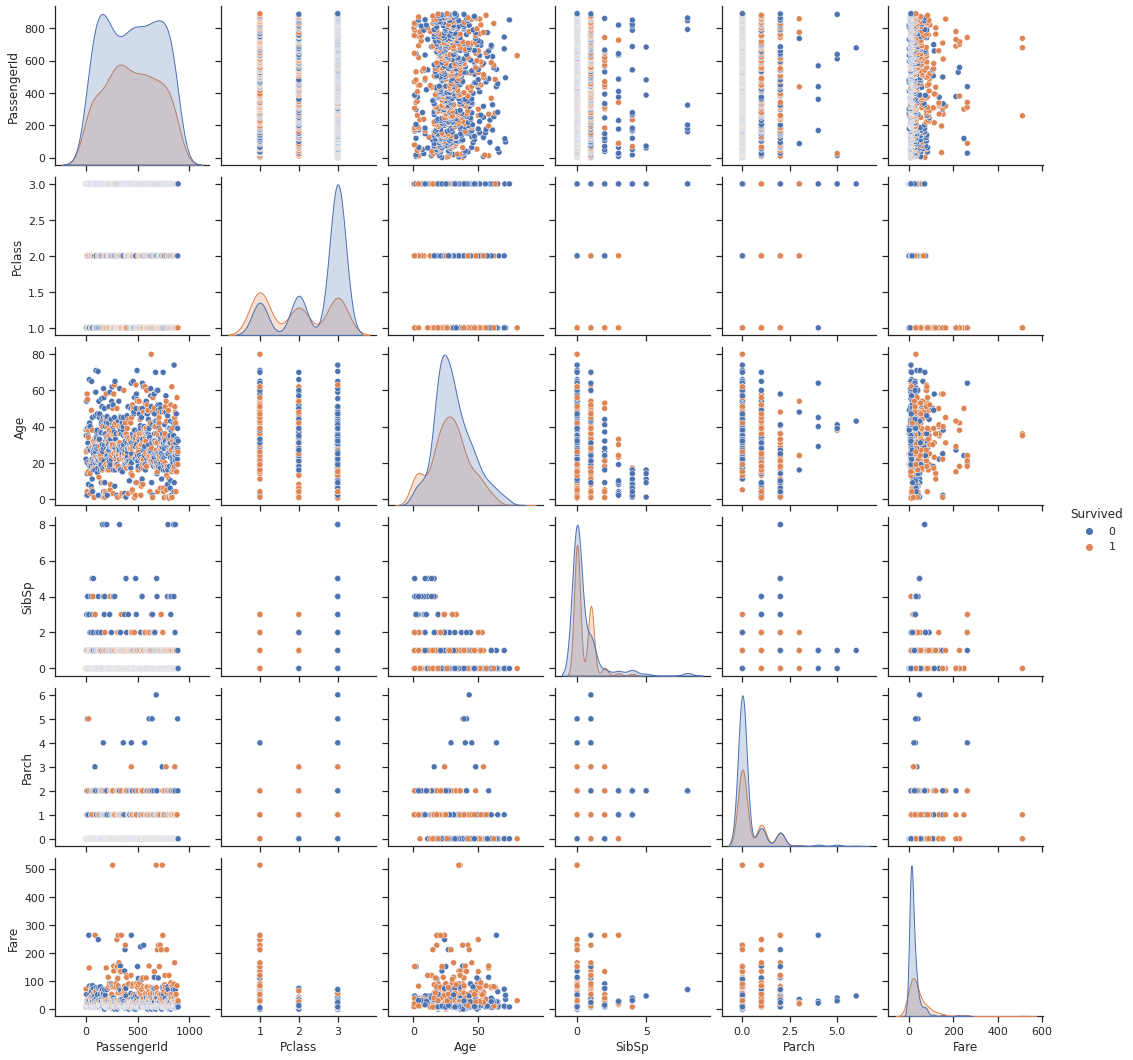

In [ ]:
sns.set(style="ticks")
sns.pairplot(df,hue="Survived")

Checking Correlation between Variables

In [ ]:
cor = df.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


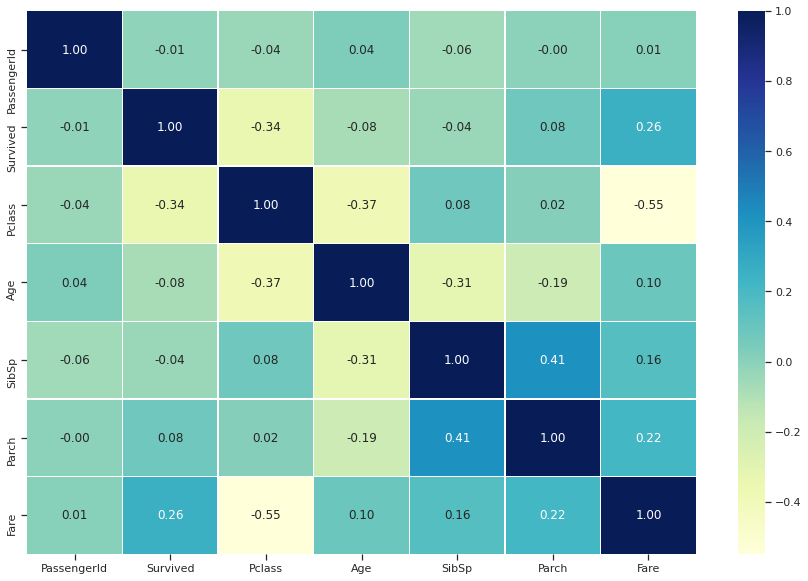

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

**Observation** : We need to perform Label Encoder to display all categorical values in the Heat Map.

In [ ]:
df['Embarked'] = df['Embarked'].astype('str')
df['Cabin'] = df['Cabin'].astype('str')

In [ ]:
#Performing Label Encoding

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df['Embarked']=LE.fit_transform(df['Embarked'])
df['Name']=LE.fit_transform(df['Name'])
df['Sex']=LE.fit_transform(df['Sex'])
df['Ticket']=LE.fit_transform(df['Ticket']) 
df['Cabin']=LE.fit_transform(df['Cabin'])                           

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


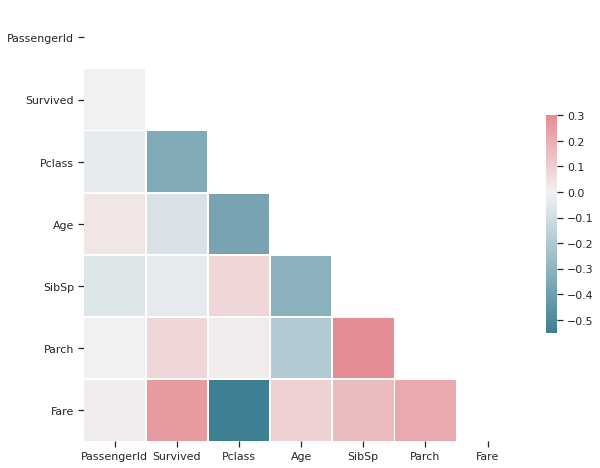

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# **Data Cleaning**

**Combining Columns with same Meaning**

In [ ]:
df['family'] = df['SibSp'] + df['Parch']

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,1
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,1
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,0
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,1
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,0


**Dropping Irrelevant Values**

In [ ]:
#Removing columns that we don't need

df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,2,0
3,1,1,0,35.0,1,0,53.1000,2,1
4,0,3,1,35.0,0,0,8.0500,2,0


In [ ]:
df.shape

(891, 9)

**1.Checking Null Values**

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
family        0
dtype: int64

**Observation** : There are 177 null values present in Age Category

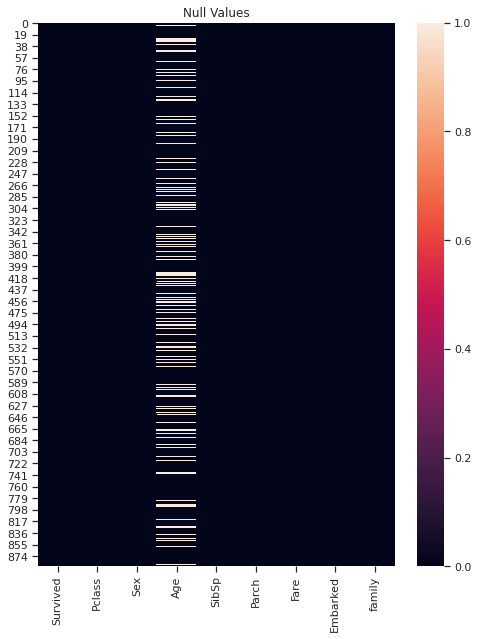

In [ ]:
#Plotting Null Values

plt.figure(figsize=[8,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

**Observation** : Let's Remove all Null Values

In [ ]:
#Filling the null values of age columns with the mean values

df['Age'].fillna(df['Age'].mean(), inplace = True)

In [ ]:
#Let's check again for null values

df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
family      0
dtype: int64

**Observation** : No Null values are present . hence lets check for outliers .

**2.Checking Outliers Presence**

In [ ]:
#Compute Outliers using zscore method

from scipy.stats import zscore

z=np.abs(zscore(df))

new_df=df [(z<3).all(axis=1)]

In [ ]:
df.shape

(891, 9)

In [ ]:
new_df.shape

(820, 9)

In [ ]:
((891-820)/891)*100

7.968574635241302

**Observation** : There will be a loss of 7.96% of data from the dataset which could be affordable .

**3.Checking Skewness**

In [ ]:
new_df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.257511
family      1.730535
dtype: float64

**Observation** : There are a number of variables where skewness has to be reduced . Lets perform it

In [ ]:
#Using PowerTransformer to remove skewness 

from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson')
for i in new_df.skew().index[1:]:
    if new_df.skew().loc[i]>0.50:
        new_df[i]=pt.fit_transform(new_df[i].values.reshape(-1,1))
    if new_df.skew().loc[i]<-0.50:
        new_df[i]=pt.fit_transform(new_df[i].values.reshape(-1,1))
    else:
        new_df[i]=new_df[i]

**Observation** : Now the dataset looks skewed and ready to go.

**Split Data and Target**

In [ ]:
#Preparing the Data
#Setting X and y-axis .
#Since we want to predict the Survival, we will drop the ‘Survived’ column.
from sklearn.model_selection import train_test_split

X = new_df.drop(['Survived'], axis=1)
y = new_df["Survived"]

In [ ]:
y.head

<bound method NDFrame.head of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64>

In [ ]:
X.head

<bound method NDFrame.head of        Pclass       Sex        Age  ...      Fare  Embarked    family
0    0.872830  0.722036  22.000000  ... -0.834702  0.583979  1.130211
1   -1.470676 -1.384973  38.000000  ...  1.553645 -1.773279  1.130211
2    0.872830 -1.384973  26.000000  ... -0.743314  0.583979 -0.745860
3   -1.470676 -1.384973  35.000000  ...  1.250341  0.583979  1.130211
4    0.872830  0.722036  35.000000  ... -0.727191  0.583979 -0.745860
..        ...       ...        ...  ...       ...       ...       ...
886 -0.595500  0.722036  27.000000  ... -0.227372  0.583979 -0.745860
887 -1.470676 -1.384973  19.000000  ...  0.654320  0.583979 -0.745860
888  0.872830 -1.384973  29.699118  ...  0.394908  0.583979  1.612739
889 -1.470676  0.722036  26.000000  ...  0.654320 -1.773279 -0.745860
890  0.872830  0.722036  32.000000  ... -0.766290 -1.184939 -0.745860

[820 rows x 8 columns]>

**Scalling**

Here we need to standardize them so that we can use the data properly. To do this, we need to apply the Scaling process to the data. Scikit-Learn's "StandardScaler" class can be used for this process:

In [ ]:
from sklearn.preprocessing import StandardScaler  # Import StandartScaler class
std_scaler = StandardScaler()  # Create instance for scaler

X = std_scaler.fit_transform(X)  # Fit and transform data with scaler

In [ ]:
X.head()

**Treating Class Imbalance**

Using SMOTE for handling imbalanced data which uses under sampling method tomek with an over sampling method SMOTE to handle imbalanced data

In [ ]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_res,y_res = SM.fit_resample(X,y)

In [ ]:
X_res.shape

(1000, 8)

In [ ]:
y_res.shape

(1000,)

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# **Preparation of Test and Train Data**

The final process here is the smooth and random separation of test and train data. For this, we will benefit from the method named "train_testsplit" from the Scikit-Learn library. I would like to use 20% of our data for testing and 80% for training purposes. The process is very simple:

In [ ]:
from sklearn.model_selection import train_test_split  # Import "train_test_split" method

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)
# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.

In [ ]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
features_label = df.columns[:11]
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) Survived                       0.298244
 2) Pclass                         0.289189
 3) Sex                            0.203242
 4) Age                            0.065578
 5) SibSp                          0.048559
 6) Parch                          0.038303
 7) Fare                           0.031793
 8) Embarked                       0.025094


**Feature Importances**

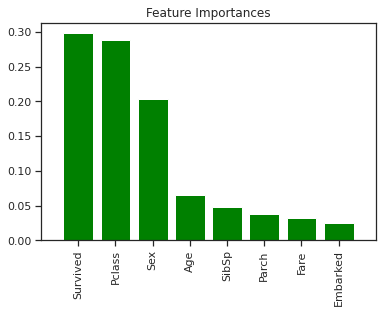

In [ ]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# **Model Training**

In [ ]:
# .....................Importing Important libraries for Classification Models................  

# Models from Scikit-Learn...

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Ensemble Techniques...

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier

# Model selection libraries...

from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
#........Defining Instances For Differnt Models and putting best parameters in them.......

lr=LogisticRegression()
DT=DecisionTreeClassifier()
GBC=GradientBoostingClassifier()
RF=RandomForestClassifier()
AD=AdaBoostClassifier()
ETC=ExtraTreesClassifier()
GNB=GaussianNB()
KNN=KNeighborsClassifier()
SVC=SVC()

In [ ]:
#   Putting Scikit-Learn machine learning Models in a list so that it can be used for 
#   further evaluation in loop.

models=[]
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',DT))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(("ExtraTreesClassifier",ETC))
models.append(("GaussianNB",GNB))
models.append(("KNeighboursClassifier",KNN))
models.append(("SupportVectorClassifier",SVC))

In [ ]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score*100)
    print('\n')

*************************** LogisticRegression *****************************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Max Accuracy Score corresponding to Random State  75 is: 83.0


Learning Score :  0.7925
Accuracy Score :  0.76
Cross Val Score :  0.7819999999999999
roc auc score :  0.76


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76       100
           1       0.75      0.78      0.76       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



Confusion Matrix:
 [[74 26]
 [22 78]]





***********************

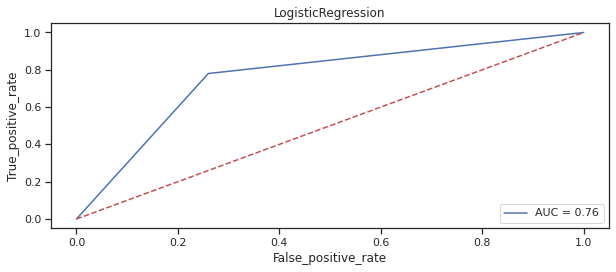

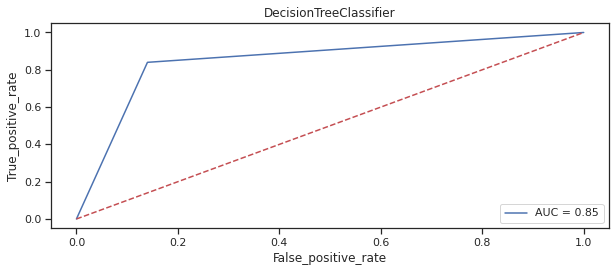

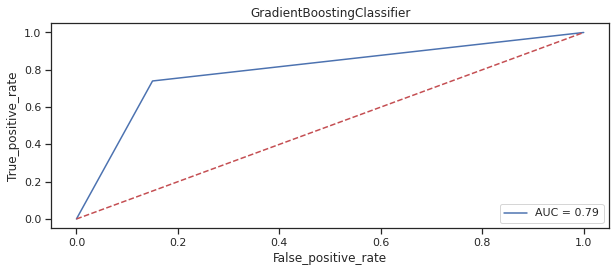

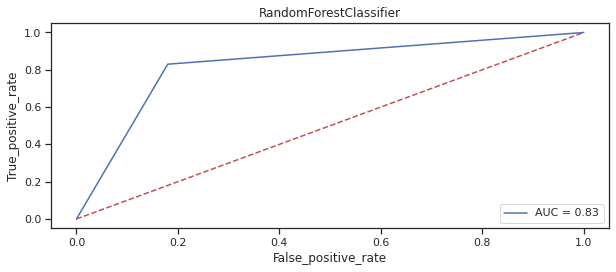

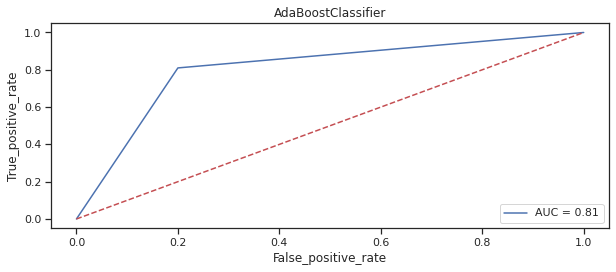

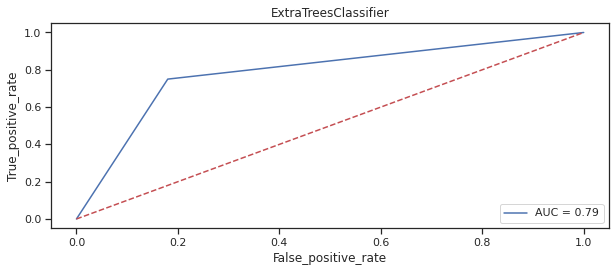

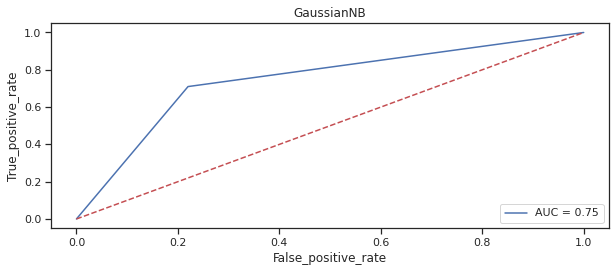

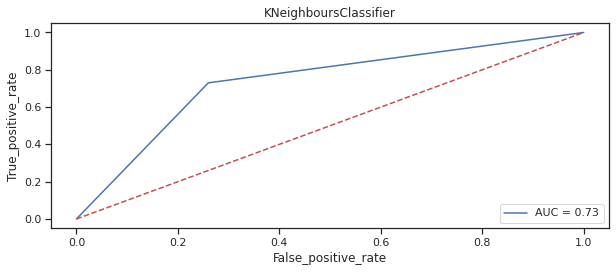

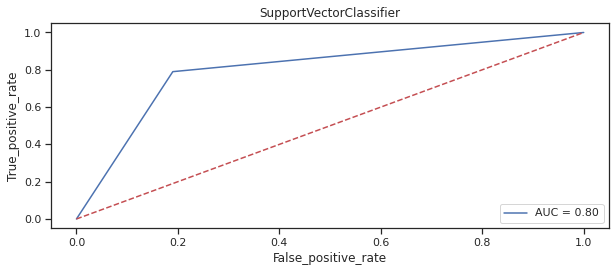

In [ ]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .

Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]

#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.

    r_state=max_acc_score(model,X_res,y_res)
    X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=r_state,stratify=y_res)
    model.fit(X_train,y_train)
    
#..............Learning Score...........

    score=model.score(X_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(X_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................  

    cv_score=cross_val_score(model,X_res,y_res,cv=5,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    #................Roc auc score...........................   

    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)

    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')

    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')

    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')

    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [ ]:
# Making a Dataframe comprises of Differnt Calculated Scores :

result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore}) 
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,LogisticRegression,79.250000,76.000000,78.200000,76.000000
1,DecisionTreeClassifier,98.625000,85.000000,78.300000,85.000000
2,GradientBoostingClassifier,89.375000,79.500000,81.400000,79.500000
3,RandomForestClassifier,98.625000,82.500000,82.200000,82.500000
4,AdaBoostClassifier,82.875000,80.500000,80.500000,80.500000
5,ExtraTreesClassifier,98.625000,78.500000,80.300000,78.500000
6,GaussianNB,76.750000,74.500000,75.200000,74.500000
7,KNeighboursClassifier,86.000000,73.500000,81.000000,73.500000
8,SupportVectorClassifier,82.250000,80.000000,79.700000,80.000000


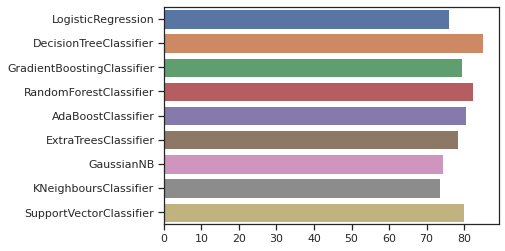

In [ ]:
# visualisation of R2 Score

sns.barplot(y=Model,x=Acc_score)

**Observation** : After Modeling process,it is concluded that Random Forest Classifier is performing well in terms of Accuracy score(f1) and Cross val score as compared to other models.
Hence Random Forest Classifier is the best fitted model for the dataset problem .

**Thus Using Gridsearch CV for Hyperparameter tuning.**

**HYPER PARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter={"max_depth": np.arange(2,10),
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [ ]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
GCV.best_params_

{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 8}

**Building Final Model**

In [ ]:
Final_mod = RandomForestClassifier( max_depth = 9, min_samples_leaf = 1, min_samples_split = 2)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

84.5


**Observation** : After the process of Hyper Parameter , it is concluded that RandomForest Classifier is giving accuracy of 84.5%. 

**Saving Final Model**

In [ ]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']